Import packages

In [24]:
using PyCall
using Pkg
using Distributions, Plots
using DataFrames
using CSV

Load dataset

In [25]:
df1 = CSV.read("/home/lucifer/Downloads/archive (4)/diabetes.csv", DataFrame)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,6,148,72,35,0,33.6,0.627
2,1,85,66,29,0,26.6,0.351
3,8,183,64,0,0,23.3,0.672
4,1,89,66,23,94,28.1,0.167
5,0,137,40,35,168,43.1,2.288
6,5,116,74,0,0,25.6,0.201
7,3,78,50,32,88,31.0,0.248
8,10,115,0,0,0,35.3,0.134
9,2,197,70,45,543,30.5,0.158


create a copy of dataframe

In [26]:
df = copy(df1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,6,148,72,35,0,33.6,0.627
2,1,85,66,29,0,26.6,0.351
3,8,183,64,0,0,23.3,0.672
4,1,89,66,23,94,28.1,0.167
5,0,137,40,35,168,43.1,2.288
6,5,116,74,0,0,25.6,0.201
7,3,78,50,32,88,31.0,0.248
8,10,115,0,0,0,35.3,0.134
9,2,197,70,45,543,30.5,0.158


display first 5 rows

In [27]:
first(df,5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,6,148,72,35,0,33.6,0.627
2,1,85,66,29,0,26.6,0.351
3,8,183,64,0,0,23.3,0.672
4,1,89,66,23,94,28.1,0.167
5,0,137,40,35,168,43.1,2.288


display number of rows

In [28]:
nrow(df)

768

display number of columns

In [29]:
ncol(df)

9

display name of columns in dataframe

In [30]:
names(df)

9-element Vector{String}:
 "Pregnancies"
 "Glucose"
 "BloodPressure"
 "SkinThickness"
 "Insulin"
 "BMI"
 "DiabetesPedigreeFunction"
 "Age"
 "Outcome"

Finding missing values

In [31]:
ismissing(df)

false

Analyze the data

In [32]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Pregnancies,3.84505,0,3.0,17,0,Int64
2,Glucose,120.895,0,117.0,199,0,Int64
3,BloodPressure,69.1055,0,72.0,122,0,Int64
4,SkinThickness,20.5365,0,23.0,99,0,Int64
5,Insulin,79.7995,0,30.5,846,0,Int64
6,BMI,31.9926,0.0,32.0,67.1,0,Float64
7,DiabetesPedigreeFunction,0.471876,0.078,0.3725,2.42,0,Float64
8,Age,33.2409,21,29.0,81,0,Int64
9,Outcome,0.348958,0,0.0,1,0,Int64


Remove Outliers

In [33]:
df1 = df1[df1.Pregnancies .<14, :]
df1 = df1[df1.Glucose .> 50, :]
df1 = df1[df1.BloodPressure .< 120, :]
df1 = df1[df1.SkinThickness .< 80, :]
df1 = df1[df1.Insulin .< 600, :]
df1 = df1[df1.BMI .< 55, :]
df1 = df1[df1.DiabetesPedigreeFunction .< 2, :]
df1 = df1[df1.Age .< 70, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,6,148,72,35,0,33.6,0.627
2,1,85,66,29,0,26.6,0.351
3,8,183,64,0,0,23.3,0.672
4,1,89,66,23,94,28.1,0.167
5,5,116,74,0,0,25.6,0.201
6,3,78,50,32,88,31.0,0.248
7,10,115,0,0,0,35.3,0.134
8,2,197,70,45,543,30.5,0.158
9,8,125,96,0,0,0.0,0.232


Inspecting Distribution

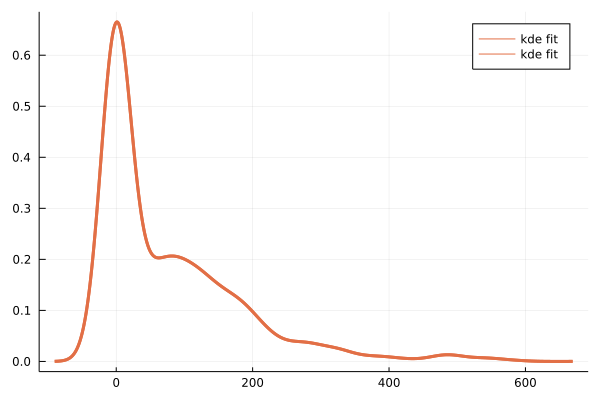

In [34]:
# visualizing the column using KDE
using StatsBase, KernelDensity

p = kde(df1.Insulin)
plot!(p.x, p.density .* length(df1.Insulin) .* 0.1,
	linewidth=3, color=2, label="kde fit")

In [35]:
# Remove Skewness by passing the column values through the log function
Ins=[]
function remove_skew(x)
    for i in x
        if i>0||i!=0
            v = log(i)
            append!(Ins, v)
        else
            v = 0
            append!(Ins, v)
        end
    end 
end


remove_skew(df1[!, :Insulin])
df1[!, :Insulin] = Float64.(Ins);


Feature scaling

In [36]:
using StatsBase
new_columns = names(df1)
n = length(names(df1))
c_names = names(df1)
for x in range(1, stop=n, length=n)
    x = Int64.(x)
    col = Float64.(df1[:, x])
    s = fit(ZScoreTransform, col)
    colm = (c_names[x]*"_"*(string(x)))
    df1[:, colm] = StatsBase.transform!(s, col)
end

In [37]:
# newly created columns
names(df1)

18-element Vector{String}:
 "Pregnancies"
 "Glucose"
 "BloodPressure"
 "SkinThickness"
 "Insulin"
 "BMI"
 "DiabetesPedigreeFunction"
 "Age"
 "Outcome"
 "Pregnancies_1"
 "Glucose_2"
 "BloodPressure_3"
 "SkinThickness_4"
 "Insulin_5"
 "BMI_6"
 "DiabetesPedigreeFunction_7"
 "Age_8"
 "Outcome_9"

In [38]:
# select features
features = select(df1, Between(:Pregnancies_1, :Age_8))

,Pregnancies_1,Glucose_2,BloodPressure_3,SkinThickness_4,Insulin_5,BMI_6
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.663306,0.891053,0.153597,0.950759,-1.00012,0.235497
2,-0.855919,-1.20163,-0.159211,0.567082,-1.00012,-0.681766
3,1.271,2.05366,-0.26348,-1.28736,-1.00012,-1.11419
4,-0.855919,-1.06876,-0.159211,0.183404,0.857555,-0.485209
5,0.359461,-0.171898,0.257867,-1.28736,-1.00012,-0.812803
6,-0.248229,-1.43415,-0.993367,0.75892,0.830586,-0.1052
7,1.87869,-0.205115,-3.6001,-1.28736,-1.00012,0.458261
8,-0.552074,2.5187,0.049328,1.59022,1.57466,-0.170719
9,1.271,0.127057,1.40483,-1.28736,-1.00012,-4.16737


In [39]:
# select label
target = df1[!, :Outcome];

In [40]:
@pyimport sklearn.model_selection as ms
# split data into train|test data
X_train, X_test, y_train, y_test = ms.train_test_split(Array(features),Array(target), test_size = 0.2, random_state=42)


4-element Vector{Array}:
 [0.05561631245797307 0.2599257863797831 … -0.7548825492618569 -0.8746275643356131; 0.6633063147561201 2.0536551295393384 … 3.2561387125402703 1.0436150448995851; … ; -1.159763692138321 -1.0023281958436079 … -0.2657336148957439 -0.7002418725869587; -0.24822868869110046 -1.26806587631169 … -0.41247829520557777 -0.7002418725869587]
 [-0.552073689840174 -0.33798399467340207 … -0.3896513449351591 -0.8746275643356131; 0.6633063147561201 0.12705694614574192 … -1.1135917677970064 1.8283506577685298; … ; -1.159763692138321 0.2599257863797831 … 0.7843060975435119 -0.35147048908964995; -0.8559186909892474 0.8246183573744579 … 0.3310280850309138 -0.35147048908964995]
 [0, 0, 1, 1, 1, 0, 0, 0, 0, 0  …  0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0  …  1, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [41]:
# visuaize the data size
size(X_train), size(X_test), size(y_train), size(y_test)

((594, 8), (149, 8), (594,), (149,))

Model Creation 

In [42]:
@pyimport sklearn
# import sklearn
svm = pyimport("sklearn.svm") #for SVC
tree = pyimport("sklearn.tree") #for decision tree
neighbors = pyimport("sklearn.neighbors") #for kn
linear_model = pyimport("sklearn.linear_model") # for logistic regression
ensemble = pyimport("sklearn.ensemble") #for ensemble methods (ex. Randomforest, 
                                        #AdaBoost, GradientBoosting)


PyObject <module 'sklearn.ensemble' from '/home/lucifer/.local/lib/python3.8/site-packages/sklearn/ensemble/__init__.py'>

In [43]:
# list of models we are going to use for classification task 
models = [svm.SVC(),tree.DecisionTreeClassifier(),neighbors.KNeighborsClassifier(),linear_model.LogisticRegression(),ensemble.RandomForestClassifier(),ensemble.AdaBoostClassifier(),ensemble.GradientBoostingClassifier()]

7-element Vector{PyObject}:
 PyObject SVC()
 PyObject DecisionTreeClassifier()
 PyObject KNeighborsClassifier()
 PyObject LogisticRegression()
 PyObject RandomForestClassifier()
 PyObject AdaBoostClassifier()
 PyObject GradientBoostingClassifier()

In [44]:
metrics = pyimport("sklearn.metrics")
# import metrics(acc. score)
for model in models
    #fit train & test data to every model and print the accuracy
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model, metrics.accuracy_score(y_test,y_pred),"\n")
end


PyObject SVC()0.7919463087248322
PyObject DecisionTreeClassifier()0.738255033557047
PyObject KNeighborsClassifier()0.785234899328859
PyObject LogisticRegression()0.825503355704698
PyObject RandomForestClassifier()0.8187919463087249
PyObject AdaBoostClassifier()0.7785234899328859
PyObject GradientBoostingClassifier()0.8053691275167785


In [45]:
#Logistic Regression has played pretty well

In [46]:
model.

LoadError: syntax: incomplete: premature end of input